<a href="https://colab.research.google.com/github/Umang-Lodaya/Technocrats_LOC-5.0/blob/main/Technocrats_LOC_5_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install tesseract
!pip install tesseract-ocr

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

paths = []

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/LOC Technocrats'):
    if dirname == "/content/drive/MyDrive/LOC Technocrats/Id-Dataset/aadhar":
        for filename in filenames:
            path = dirname + '/' + filename
            paths.append(path)


print(paths[:5])

['/content/drive/MyDrive/LOC Technocrats/Id-Dataset/aadhar/26.jpg', '/content/drive/MyDrive/LOC Technocrats/Id-Dataset/aadhar/4.jpg', '/content/drive/MyDrive/LOC Technocrats/Id-Dataset/aadhar/18.jpg', '/content/drive/MyDrive/LOC Technocrats/Id-Dataset/aadhar/12.jpg', '/content/drive/MyDrive/LOC Technocrats/Id-Dataset/aadhar/2.jpg']


In [ ]:
!sudo apt install tesseract-ocr-mal
!tesseract --list-langs

In [ ]:
!pip install easyocr

In [ ]:
import easyocr
import cv2
from google.colab.patches import cv2_imshow

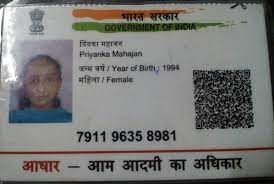

In [ ]:
img = cv2.imread(paths[4])
cv2_imshow(img)

In [ ]:
reader = easyocr.Reader(['en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [ ]:
result = reader.readtext(img, detail = 0)
result

['FI 4U',
 'Priranko Vunjar',
 'TT ! Ycar D Dut 1824',
 '41741',
 'Famnin',
 '7911 9635 8981',
 'MM4R',
 '314 3aff #1 aferr']

In [15]:
def funct(path):
    img = cv2.imread(path)
    # cv2_imshow(img)
    reader = easyocr.Reader(['en'])
    result = reader.readtext(img, detail = 0)
    return result

In [ ]:
outputs = []
for i in paths:
    outputs.append(' '.join(funct(i)))

In [20]:
outputs[:10]

['HT HTTN Govexnmen: cl India Ig7 7Gu Kunta Knnozhzn TarTpor 11/09*1353 TAT / Feciele 2114 5270 9955 HTER HT4 3141 T 3fu47',
 '8689 2565 8268 HTU77 3MTJT #i & #f0c JURAJ 84J4, 7 FA Woz C1c04T: 8689 2565 8268 HTUTT 31TA 314H 3uF Open',
 '5947 1158 3638 JcH #1 3uaFt HUR HT4',
 '@b8w  N1J8TTI6SLD Government of India g6UQTWJI Csm Aishwarya G 0dbg BitGT DOB 17/11/1999 QuGUTUrou Female 3052 7875 6145 950if &0gmIGoot   LO6oflg6oflgot   91g1s1gu',
 'FI 4U Priranko Vunjar TT ! Ycar D Dut 1824 41741 Famnin 7911 9635 8981 MM4R 314 3aff #1 aferr',
 'aat 744M Scumudo FIfwOOe Q101/1083 {M4lE 50bd [483 00z1 4u t TrT',
 'HRT HITR Government of India RrRT Riyasat J4 fafet/ DOB: 01/01/1991 9 1 MALE 6754 3973 8680 AT 3r8R , A 4uit',
 'HRd Htn KOvEbNMENTO= INDIA Jh aTIDOB.25/12/1993 5or Male 3962 4463 577 H<T 3TETr, H& 4JTt',
 'ATT TTT Government of India 3ut 7974 77 L Reshma Raza 1 74 AridoB: 06/07/1968 8 9a FEMALE 1 3 8 1 8 8378 7495 7171 VID : 9186 5263 2401 8327 AT 3ret< , TTT 98 JTT',
 'Taia Rajeev S

In [39]:
len(outputs)

38

In [43]:
import re
uid = []
nan = []
j = 1
for i in outputs:
    id = re.findall('\d{4}\s\d{4}\s\d{4}', i)
    if id == []:
        nan.append(outputs.index(i))
        print(j, outputs.index(i))
        j += 1
# print(uid)

1 5
2 7
3 10
4 12
5 13
6 25
7 28
8 29
9 30
10 32
11 34
12 35
13 36


In [46]:
for i in nan:
    print(i, outputs[i], '\n')

5 aat 744M Scumudo FIfwOOe Q101/1083 {M4lE 50bd [483 00z1 4u t TrT 

7 HRd Htn KOvEbNMENTO= INDIA Jh aTIDOB.25/12/1993 5or Male 3962 4463 577 H<T 3TETr, H& 4JTt 

10 CApile Sovammon clinu e Doin { Lepcna Guardiba Kannu Lepema 7uiu2 20ju Femnlo 54837240 8438 TT 3UR , 4X 44m7 

12 edii Nimo **X DoB; Kx-XX-XXXX andecHAi Uuuu MM2222 MyT MT )AXutr 

13 Bwa1}eatiualn ovenmenioenid BtaM Cr Crt 0J0 - 1743164129 Diennor |Feal 7875.6145_ JgTge  [6oilg6ils1 & dsni 3052 4s0 

25 aln Htenl 3 40t 7 Vetns 27(0g:19X EHULJEI 

28 123 420{ 3l4b-JRl Vadebr Rac Do: 09je1o3 ITTTTTTTTTTt 432442 Hz/ uluu 

29 3376_1161 1045 Hv HTUR , ## 47m Jeuager 

30 2472 tu 4gar 

32 E Jena 4m 41/01uo 36(* 6905 6708 7 M14 M1adr 4 3n84R 

34 YIRutur Government QeInDia #TAT Seema Kumari Tfaf/ DOB: 05/03/1998 Aiaat FEMALE 4751 4226 70Z6 H1HTT-H114 :1ahft #T afelrr ptTA 

35 HTT Governn Gat of India Nazneen Sultan Zaidi Guardian Almas Vasim Zaidi DOB 20/01/1952 Female 92986849 3111 HT HTUR , Ait 4ul 

36 TTnntl duurn Heg-c 7

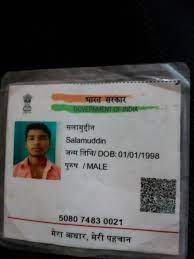

In [47]:
img = cv2.imread(paths[5])
cv2_imshow(img)